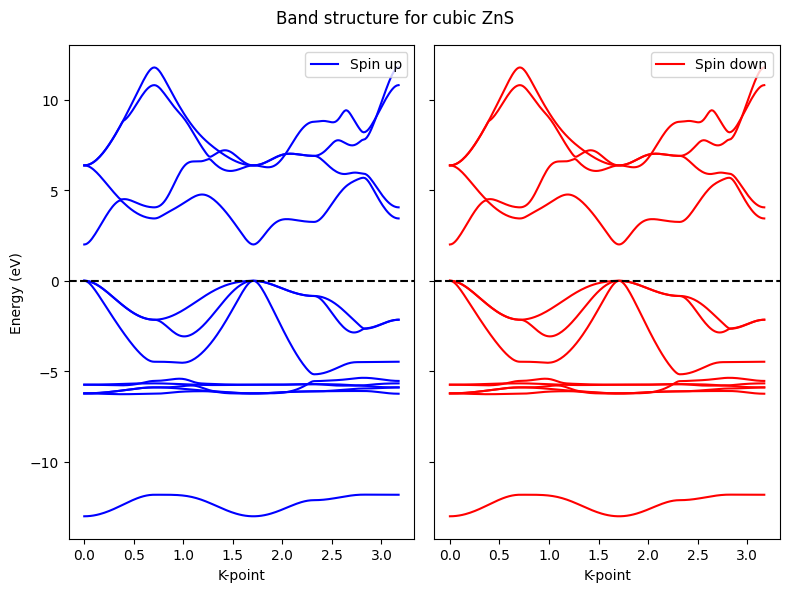

In [2]:
import matplotlib.pyplot as plt

def read_band_structure(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    k_points = []
    energies = []
    current_k_points = []
    current_energies = []

    for line in lines:
        if line.strip() == '':
            if current_k_points and current_energies:
                k_points.append(current_k_points)
                energies.append(current_energies)
                current_k_points = []
                current_energies = []
        else:
            k, e = map(float, line.split())
            current_k_points.append(k)
            current_energies.append(e)
    
    # Append the last block if there is no trailing newline
    if current_k_points and current_energies:
        k_points.append(current_k_points)
        energies.append(current_energies)

    return k_points, energies

# Function to shift energies relative to the Fermi level
def shift_energies(energies, fermi_level):
    return [[e - fermi_level for e in band] for band in energies]

# Paths to your spin-up and spin-down files
spin_up_file = 'ZnS.bands_up.gnu'
spin_down_file = 'ZnS.bands_dw.gnu'

# Read the band structures
k_points_up, energies_up = read_band_structure(spin_up_file)
k_points_down, energies_down = read_band_structure(spin_down_file)

# Define the Fermi level
fermi_level = 5.5452  # Change this value as needed

# Shift energies relative to the Fermi level
energies_up = shift_energies(energies_up, fermi_level)
energies_down = shift_energies(energies_down, fermi_level)

# Define the k-path ticks and labels
#k_ticks = [0, 0.8660, 1.8660, 2.2196, 3.2802]
#k_labels = ['L', '$\Gamma$', 'X', 'U', '$\Gamma$']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)

# Plot spin-up band structure
for k_points, energies in zip(k_points_up, energies_up):
    axes[0].plot(k_points, energies, 'b-')
axes[0].set_xlabel('K-point')
axes[0].set_ylabel('Energy (eV)')
axes[0].axhline(y=0, color='k', linestyle='--')
#axes[0].set_xticks(k_ticks)
#axes[0].set_xticklabels(k_labels)
axes[0].legend(['Spin up'], loc=1)

# Plot spin-down band structure
for k_points, energies in zip(k_points_down, energies_down):
    axes[1].plot(k_points, energies, 'r-')
axes[1].set_xlabel('K-point')
axes[1].axhline(y=0, color='k', linestyle='--')
#axes[1].set_xticks(k_ticks)
#axes[1].set_xticklabels(k_labels)
axes[1].legend(['Spin down'], loc=1)

# Display the plot
plt.suptitle("Band structure for cubic ZnS")
plt.tight_layout()
plt.show()
